In [14]:
# Ma’lumotni yuklash va kerakli ustunlarni ajratish
import pandas as pd

# Ma'lumotni yuklash
df = pd.read_csv("Global_Unemployment_Data.csv")

# Faqat kerakli ustunlarni olish
columns_needed = ['country_name', 'sex', 'age_group', 'age_categories'] + [str(y) for y in range(2016, 2024)]
df = df[columns_needed]     
df.head()


,country_name,sex,age_group,age_categories,2016,2017,2018,2019,2020,2021,2022,2023
0,Afghanistan,Female,15-24,Youth,18.570,21.137,20.649,20.154,21.228,21.640,30.561,32.200
1,Afghanistan,Female,25+,Adults,9.463,9.920,11.223,12.587,14.079,14.415,23.818,26.192
2,Afghanistan,Female,Under 15,Children,12.789,14.017,14.706,15.418,16.783,17.134,26.746,29.193
3,Afghanistan,Male,15-24,Youth,13.772,16.027,15.199,14.361,14.452,15.099,16.655,18.512
4,Afghanistan,Male,25+,Adults,7.301,7.728,7.833,7.961,8.732,9.199,11.357,12.327


In [15]:
# Ma’lumotni long formatga o‘tkazish
df_long = df.melt(id_vars=['country_name', 'sex', 'age_group', 'age_categories'],
                  var_name='year',
                  value_name='unemployment_rate')

In [16]:
# Data tiplari va NaN qiymatlarni tekshirish
print(df_long.dtypes)

print(df_long.isnull().sum())

country_name          object
sex                   object
age_group             object
age_categories        object
year                  object
unemployment_rate    float64
dtype: object
country_name          0
sex                   0
age_group             0
age_categories        0
year                  0
unemployment_rate    18
dtype: int64


In [17]:
# Null qiymatlarni olib tashlash
df_long = df_long.dropna()

# Yil ustunini butun son (int) formatiga o‘tkazish
df_long['year'] = df_long['year'].astype(int)


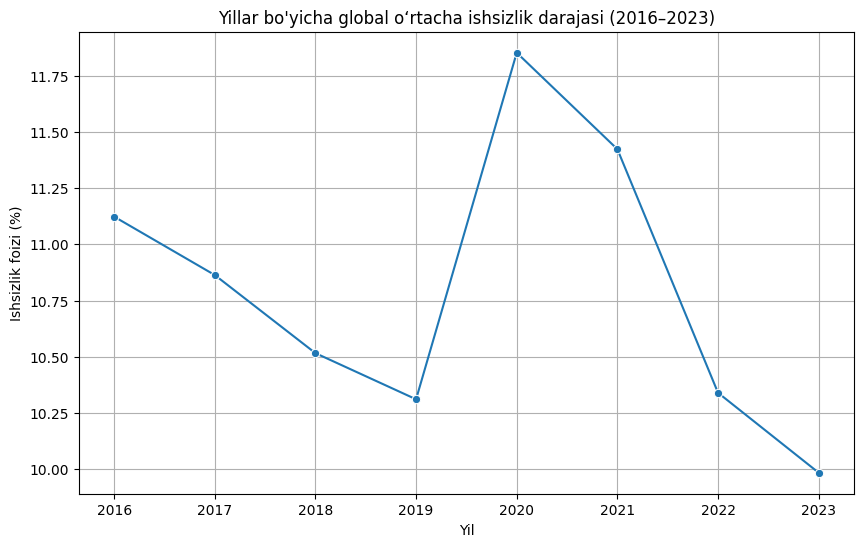

In [21]:
#Global o‘rtacha ishsizlik (2016–2023)

import matplotlib.pyplot as plt
import seaborn as sns

global_avg = df_long.groupby('year')['unemployment_rate'].mean().reset_index()

plt.figure(figsize=(10, 6))
sns.lineplot(data=global_avg, x='year', y='unemployment_rate', marker='o')
plt.title("Yillar bo'yicha global o‘rtacha ishsizlik darajasi (2016–2023)")
plt.ylabel("Ishsizlik foizi (%)")
plt.xlabel("Yil")
plt.grid(True)
plt.show()

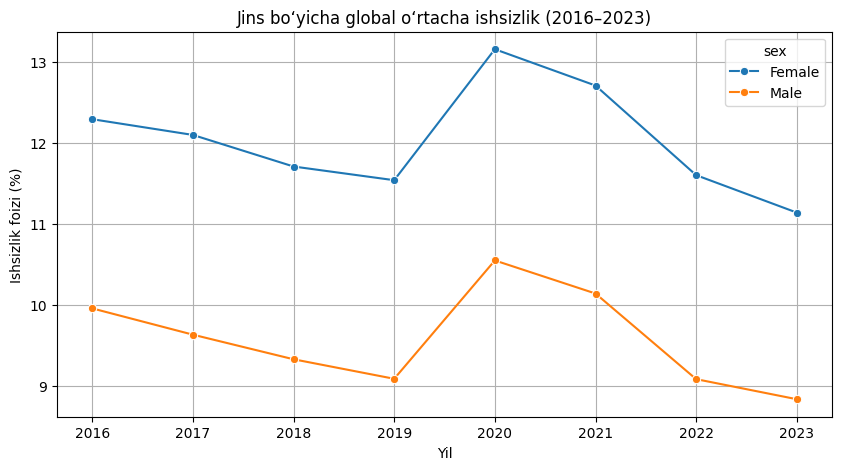

In [22]:
# Jins bo‘yicha global o‘rtacha ishsizlik (2016–2023)
gender_avg = df_long.groupby(['year', 'sex'])['unemployment_rate'].mean().reset_index()

plt.figure(figsize=(10, 5))
sns.lineplot(data=gender_avg, x='year', y='unemployment_rate', hue='sex', marker='o')
plt.title("Jins bo‘yicha global o‘rtacha ishsizlik (2016–2023)")
plt.ylabel("Ishsizlik foizi (%)")
plt.xlabel("Yil")
plt.grid(True)
plt.show()

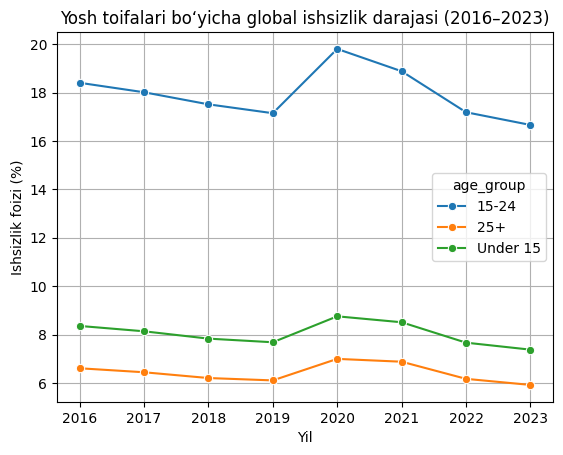

In [28]:
# Yosh guruhlari bo‘yicha global o‘rtacha ishsizlik (2016–2023)

age_avg = df_long.groupby(['year', 'age_group'])['unemployment_rate'].mean().reset_index()

sns.lineplot(data=age_avg, x='year', y='unemployment_rate', hue='age_group', marker='o')
plt.title("Yosh toifalari bo‘yicha global ishsizlik darajasi (2016–2023)")
plt.ylabel("Ishsizlik foizi (%)")
plt.xlabel("Yil")
plt.grid(True)
plt.show()

C:\Users\BoastfulApex\AppData\Local\Temp\ipykernel_13032\3855979202.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_10_2023, y='country_name', x='unemployment_rate', palette='Reds_r')


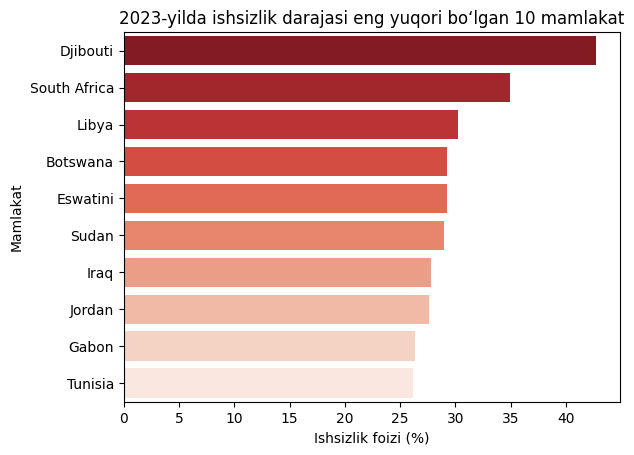

In [40]:
# 2023 yilda ishsizlik darajasi eng yuqori bo‘lgan davlatlar

top_10_2023 = df_long[df_long['year']==2023].groupby('country_name')['unemployment_rate'].mean().nlargest(10).reset_index()

sns.barplot(data=top_10_2023, y='country_name', x='unemployment_rate', palette='Reds_r')
plt.title("2023-yilda ishsizlik darajasi eng yuqori bo‘lgan 10 mamlakat")
plt.xlabel("Ishsizlik foizi (%)")
plt.ylabel("Mamlakat")
plt.show()